In [17]:
import plotly.graph_objects as go
import networkx as nx
import os

# reading input log file

# test_name = "arldm_chunk2k4c_ssd"
# test_name = "vist_1t"
# test_name = "vist_1t_chunk"
# test_name = "ss_s9f9p8_0"
# test_name = "s9f9p8_0"
# test_name = "ddmd_skipsim"
# test_name = "ddmd"
test_name = "f24s9p12_1"

stat_path=f"example_stat/{test_name}"
image_path=f"{stat_path}/images"

VFD_ACCESS_SKIP=10

ADD_ADDR=False

STAGE_START = 0
STAGE_END = 10

SUBGRAPH=True


In [18]:
# My utility functions
import utils.stat_loader as sload
import utils.stat_print as sp
import utils.vfd_stat2graph as vfd2g
import utils.vfd_graph2sankey as vfd2sk
import utils.full_stat2graph as f2g

# Improve Functions
## TODO
- Add dataset nodes
- Add file address ordering nodes


In [19]:



TASK_ORDER_LIST = sload.load_task_order_list(stat_path)
STAGE_END = sload.correct_end_stage(TASK_ORDER_LIST, STAGE_END)

TASK_ORDER_LIST = sload.current_task_order_list(TASK_ORDER_LIST, STAGE_START, STAGE_END)

TASK_LISTS = list(TASK_ORDER_LIST.keys())

print(f"TASK_ORDER_LIST = {TASK_ORDER_LIST}")
TASK_LISTS


STAGE_END is not in TASK_ORDER_LIST, set to max order: 8
TASK_ORDER_LIST = {'run_idfeature': 0, 'run_tracksingle': 1, 'run_gettracks': 2, 'run_trackstats': 3, 'run_identifymcs': 4, 'run_matchpf': 5, 'run_robustmcs': 6, 'run_mapfeature': 7, 'run_speed': 8}


['run_idfeature',
 'run_tracksingle',
 'run_gettracks',
 'run_trackstats',
 'run_identifymcs',
 'run_matchpf',
 'run_robustmcs',
 'run_mapfeature',
 'run_speed']

In [20]:
vfd_files = sload.find_files_with_pattern(stat_path, "vfd")
# vfd_files = vfd_files[0:1]
print(f"vfd_files: {vfd_files}")

vfd_dict = sload.load_stat_json(vfd_files)
# print(vfd_dict)


vol_files = sload.find_files_with_pattern(stat_path, "vol")
# vol_files = vol_files[0:1]
print(f"vol_files: {vol_files}")

vol_dict = sload.load_stat_json(vol_files)

print("loading json done")

vfd_files: ['example_stat/f24s9p12_1/185780-vfd_data_stat.json', 'example_stat/f24s9p12_1/185835-vfd_data_stat.json', 'example_stat/f24s9p12_1/185838-vfd_data_stat.json', 'example_stat/f24s9p12_1/185828-vfd_data_stat.json', 'example_stat/f24s9p12_1/185846-vfd_data_stat.json', 'example_stat/f24s9p12_1/185855-vfd_data_stat.json', 'example_stat/f24s9p12_1/185868-vfd_data_stat.json', 'example_stat/f24s9p12_1/185850-vfd_data_stat.json', 'example_stat/f24s9p12_1/185870-vfd_data_stat.json', 'example_stat/f24s9p12_1/185832-vfd_data_stat.json', 'example_stat/f24s9p12_1/185842-vfd_data_stat.json', 'example_stat/f24s9p12_1/185859-vfd_data_stat.json', 'example_stat/f24s9p12_1/186044-vfd_data_stat.json', 'example_stat/f24s9p12_1/185864-vfd_data_stat.json', 'example_stat/f24s9p12_1/186004-vfd_data_stat.json']
loading example_stat/f24s9p12_1/185780-vfd_data_stat.json
loading example_stat/f24s9p12_1/185835-vfd_data_stat.json
loading example_stat/f24s9p12_1/185838-vfd_data_stat.json
loading example_sta

In [21]:
# # Show VFD Tracker overhead
# sp.show_all_overhead("VFD", vfd_dict)

In [22]:
def inc_in_dict(dic, k):
    if k not in dic:
        dic[k] = 0
    else:
        dic[k]+=1



G_VFD = nx.DiGraph()
G_VFD = f2g.add_task_dset_file_nodes(G_VFD, vfd_dict, TASK_ORDER_LIST, add_addr=ADD_ADDR)

# sp.display_all_edges_attr(G_VFD)
# sp.display_all_nodes_position(G_VFD)

In [23]:

file_page_nodes_attr, dset_page_edges = f2g.get_file_dset_maps(vfd_dict, TASK_ORDER_LIST)

# for k,v in file_page_nodes_attr.items(): print(f"file_page_nodes_attr: {k} -> {v}")
# for k,v in add_edge_stat.items(): print(f"add_edge_stat: {k} -> {v}")



KeyboardInterrupt: 

In [ ]:
def update_nodes_edges(G,add_edge_stat, edges_to_remove, nodes_to_add):
    G.remove_edges_from(edges_to_remove)
    
    G.add_edges_from(add_edge_stat.keys())
    nx.set_edge_attributes(G, add_edge_stat)
    
    for page_nodes in nodes_to_add:
        G.add_node(page_nodes, pos=nodes_to_add[page_nodes][page_nodes]['pos'])
        page_node_attrs = {page_nodes: {'rpos':nodes_to_add[page_nodes][page_nodes]['rpos'], 'phase': nodes_to_add[page_nodes][page_nodes]['phase'], 'type':nodes_to_add[page_nodes][page_nodes]['type'], 'size': nodes_to_add[page_nodes][page_nodes]['size'], 'range': nodes_to_add[page_nodes][page_nodes]['range']}}
        nx.set_node_attributes(G, page_node_attrs)
        # print added new node
        print(f"add new node: {page_nodes} -> {G.nodes[page_nodes]}")
    return G

if ADD_ADDR:
    add_edge_stat,edges_to_remove,nodes_to_add = f2g.add_file_page(G_VFD, file_page_nodes_attr, dset_page_edges)
    G_VFD = update_nodes_edges(G_VFD,add_edge_stat, edges_to_remove, nodes_to_add)

    print(f"edges_to_remove: {edges_to_remove}")

add new node: [0-76)-2-R -> {'pos': (16, 0), 'rpos': 1, 'phase': 2, 'type': 'addr', 'size': 4980736, 'range': (0, 76)}
add new node: [76-152)-2-R -> {'pos': (16, 1), 'rpos': 1, 'phase': 2, 'type': 'addr', 'size': 4980736, 'range': (76, 152)}
add new node: [152-228)-2-R -> {'pos': (16, 2), 'rpos': 1, 'phase': 2, 'type': 'addr', 'size': 4980736, 'range': (152, 228)}
add new node: [0-76)-2-W -> {'pos': (14, 3), 'rpos': 1, 'phase': 2, 'type': 'addr', 'size': 4980736, 'range': (0, 76)}
add new node: [76-152)-2-W -> {'pos': (2, 4), 'rpos': 1, 'phase': 2, 'type': 'addr', 'size': 4980736, 'range': (76, 152)}
add new node: [152-228)-2-W -> {'pos': (2, 5), 'rpos': 1, 'phase': 2, 'type': 'addr', 'size': 4980736, 'range': (152, 228)}
add new node: [0-76)-0-R -> {'pos': (1, 0), 'rpos': 1, 'phase': 0, 'type': 'addr', 'size': 4980736, 'range': (0, 76)}
add new node: [76-152)-0-R -> {'pos': (1, 1), 'rpos': 1, 'phase': 0, 'type': 'addr', 'size': 4980736, 'range': (76, 152)}
add new node: [152-228)-0-R 

edge_types: {'page-dset', 'task-dset', 'dset-task', 'file-page', 'page-file', 'dset-page'}


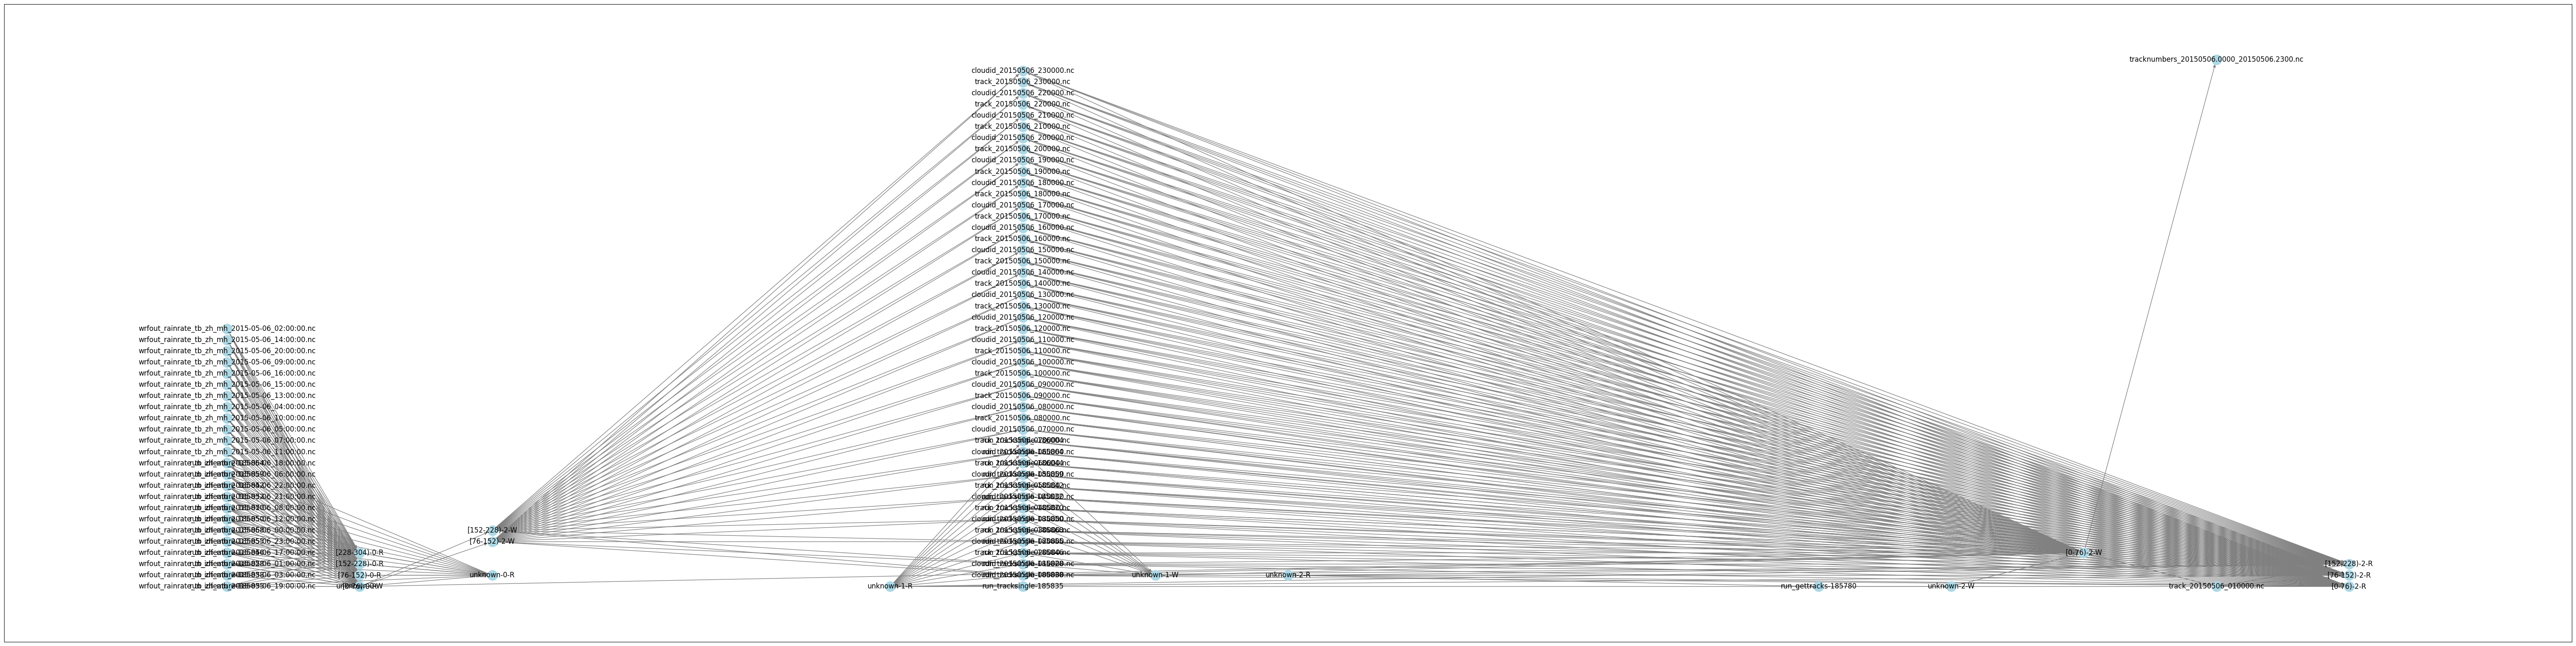

In [ ]:
# G_VFD = vfd2g.set_task_position_full(G_VFD, task_file_map, STAGE_START)
# sp.display_all_nodes_attr(G_VFD)
all_edge_types = nx.get_edge_attributes(G_VFD,'edge_type')
edge_types = []
for edge in all_edge_types:
    edge_types.append(all_edge_types[edge])

print(f"edge_types: {set(edge_types)}")

sp.draw_graph(G_VFD, test_name, stat_path, graph_type="vfd", prefix=f'{(STAGE_END+1)}s', save=True)

In [ ]:
# sp.display_all_edges_attr(G_VFD)
# sp.display_all_nodes_position(G_VFD)

# Add networkx to Sankey diagram

## Statistics for Sankey
Below are needed edge attributes before generating the sankey diagram:
- access_cnt : The total file/dataset access count 
- access_size : The total read and write access size
- operation : The operation type : read, write, read_write
- bandwidth : Get the per access size and time, then calculate the bandwidth. Average the bandwidth if multiple accesses. (TODO: currently only recording one access size and time)




In [ ]:
if ADD_ADDR: f2g.prepare_sankey_stat_full(G_VFD, vol_dict)
else: f2g.prepare_sankey_stat_no_addr(G_VFD, vol_dict)
    
vfd2sk.time_to_file_x_pos(G_VFD)

edge: ('run_gettracks-185780', 'unknown-2-W') -> task-dset
edge: ('unknown-2-R', 'run_gettracks-185780') -> dset-task
edge: ('run_idfeature-185835', 'unknown-0-W') -> task-dset
edge: ('unknown-0-R', 'run_idfeature-185835') -> dset-task
edge: ('unknown-0-R', 'run_idfeature-185838') -> dset-task
edge: ('unknown-0-R', 'run_idfeature-185828') -> dset-task
edge: ('unknown-0-R', 'run_idfeature-185846') -> dset-task
edge: ('unknown-0-R', 'run_idfeature-185855') -> dset-task
edge: ('unknown-0-R', 'run_idfeature-185868') -> dset-task
edge: ('unknown-0-R', 'run_idfeature-185850') -> dset-task
edge: ('unknown-0-R', 'run_idfeature-185870') -> dset-task
edge: ('unknown-0-R', 'run_idfeature-185832') -> dset-task
edge: ('unknown-0-R', 'run_idfeature-185842') -> dset-task
edge: ('unknown-0-R', 'run_idfeature-185859') -> dset-task
edge: ('unknown-0-R', 'run_idfeature-185864') -> dset-task
edge: ('unknown-1-R', 'run_tracksingle-185835') -> dset-task
edge: ('unknown-1-R', 'run_tracksingle-185838') -> dse

In [ ]:
# "PID", "DATASETNAME", "FILENAME"

vfd_nodes, vfd_nodes_dict = vfd2sk.get_nodes_for_sankey(G_VFD, rm_tags=["-R", "-W", "PID", "", ""], label_on=True)

# print(vfd_nodes)

vfd_links = vfd2sk.get_links_for_sankey(G_VFD, vfd_nodes_dict, val_sqrt=True, highlight=False)
fig = go.Figure(go.Sankey(
            node = vfd_nodes,
            link = vfd_links, orientation='h'))

width = 1200
height = 1000

fig.update_layout(
    autosize=False,
    width=width,
    height=height,
    margin=dict(
        l=width/10,
        r=width/1.5,
        b=height/2,
        t=height/4,
        # pad=2
    ),
    font=dict(size=18),
)


fig.show()
save_html_path = f"{stat_path}/vfd-{(STAGE_END+1)}s-{test_name}-sankey-labeled-s4.html"
fig.write_html(save_html_path)
print(f"Sankey saved to {save_html_path}")

bandwidth range: 0 ~ 1.05 TB/s


Sankey saved to example_stat/f24s9p12_1/vfd-3s-f24s9p12_1-sankey-labeled-s4.html


In [ ]:
stat_str = sp.show_vfd_stats(G_VFD)
print(stat_str)



Total number of links: 398
Total I/O size: 2.89 GB
Total I/O count: 327490
Total bandwidth: 690.03 B/s
Average I/O size: 8.82 KB
Medium I/O size: 5.77 MB
Inital input size: 198.08 MB



In [ ]:
# Create subgraph

def remove_graph_after_node(G, node):
    stack = [node]  # Use a stack to simulate recursion

    while stack:
        current_node = stack.pop()
        out_edges = list(G.out_edges(current_node))
        # if out edges match the passed in node, do not remove the edge
        out_edges = [edge for edge in out_edges if edge[1] != node]
        
        if not out_edges:
            continue
        for edge in out_edges:
            downstream_node = edge[1]
            stack.append(downstream_node)

        G.remove_edges_from(out_edges)

    # Remove disconnected nodes
    for node in list(nx.isolates(G)):
        G.remove_node(node)
    
    for node in new_G.nodes:
        nodes_to_remove = []
        # remove node contain string "embedding"
        if "embedding" in node:
            nodes_to_remove.append(node)
    G.remove_nodes_from(nodes_to_remove)



In [ ]:
if SUBGRAPH:
    new_G = G_VFD.copy()
    after_node="flintstones_out.h5" #"flintstones_out.h5" "training-42584" # exact name
    remove_graph_after_node(new_G, after_node)
    print(f"Is G_VFD and new_G the same: {nx.is_isomorphic(G_VFD, new_G)}")

    vfd_nodes, vfd_nodes_dict = vfd2sk.get_nodes_for_sankey(new_G, rm_tags=["-R", "-W", "PID", ], label_on=True) # "-1", "-2", "-3"

    # print(vfd_nodes)

    vfd_links = vfd2sk.get_links_for_sankey(new_G, vfd_nodes_dict, val_sqrt=True, highlight=True)
    fig = go.Figure(go.Sankey(
                node = vfd_nodes,
                link = vfd_links, orientation='h'))

    width = 1000
    height = 1000

    fig.update_layout(
        autosize=False,
        width=width,
        height=height,
        margin=dict(
            l=width/10,
            r=width/10,
            b=height/10,
            t=height/4,
            # pad=2
        ),
        font=dict(size=18),
    )

    fig.show()
    save_html_path = f"{stat_path}/vfd-{(STAGE_END+1)}s-{test_name}-sankey-labeled-s4-subgraph.html"
    fig.write_html(save_html_path)
    print(f"Sankey saved to {save_html_path}")

Is G_VFD and new_G the same: True
bandwidth range: 0 ~ 1.05 TB/s


Sankey saved to example_stat/f24s9p12_1/vfd-3s-f24s9p12_1-sankey-labeled-s4-subgraph.html


In [ ]:
# # Create a manual legend using annotations.

# def add_legend_to_graph(fig,save_img=False):
#     LEGEND_ITEMS = {
#         "Tasks":{"color":"red", "text":"Tasks"},
#         "Files":{"color":"blue", "text":"Files"},
#         "Edges":{"color":"lightblue", "text":"File bandwidth, darker the color, higher the bandwidth"},
#     }

#     legend_items = [
#         go.layout.Annotation(
#             x=0.9,  # X-coordinate for legend item
#             y=0.85 - i * 0.03,  # Y-coordinate for legend item (adjust for position)
#             xref='paper',
#             yref='paper',
#             text=f"{item_type} - {LEGEND_ITEMS[item_type]['color']}",
#             showarrow=False,
#             font=dict(size=14, color=LEGEND_ITEMS[item_type]['color']),
#             # bordercolor='grey',  # Set the border color for the legend box
#             # borderwidth=1,  # Set the border width for the legend box
#             bgcolor='rgba(255, 255, 255, 0.7)',  # Add a transparent background color
#         )
#         for i, item_type in enumerate(LEGEND_ITEMS.keys())
#     ]
#     fig.update_layout(annotations=legend_items)
#     fig.show()
#     if save_img:
#         fig.write_html(f"{stat_path}/vfd-{(STAGE_END+1)}s-{test_name}-sankey-annotated.html")
